In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** (15) Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(\hat{x}) d\hat{x}$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [2]:
def int_diff_error(x, f):
    ### INSERT CODE HERE
    """This function take in x values and the function f(x) and return a vector of the errors for each value x given
    Parameters: x, f(x)
    Return: a vector of errors for each value x
    """

    # Use uniform discretization
    N = len(x)
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x_hat = x_hat[1] - x_hat[0]
    f_prime = numpy.empty(x_hat.shape)
    Qf = numpy.empty(x_hat.shape)
    errors = numpy.empty(x_hat.shape)
    
    #left point
    f_prime[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x_hat)
    Qf[0] = f_prime[0]*delta_x_hat
    errors[0] = f(0.0) - f(0.0) - Qf[0]
    #right point
    f_prime[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x_hat)
    Qf[-1] = f_prime[-1]*delta_x_hat
    errors[-1] = f(1.0) - f(0.0) - Qf[-1]
    #interval points
    f_prime = numpy.empty(x_hat.shape)
    f_prime[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x_hat)
    for i in xrange(1, len(f_prime)):
        Qf[i] = Qf[i-1] + f_prime[i]*delta_x_hat
    errors = numpy.abs(f(x) - f(0) - Qf)
    return errors

In [3]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(int_diff_error(x, f))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00630738192428
Successful FTC evaluation.


**(b)** (15) Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(\hat{x}) d\hat{x}$$


In [4]:
def diff_int_error(x, f):
    ### INSERT CODE HERE
    """This function take in x values and the function f(x) and return a vector of the errors for each value x given
    Parameters: x, f(x)
    Return: a vector of errors for each value x
    """
    
    N = len(x)
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x_hat = x_hat[1] - x_hat[0]
    f_prime = numpy.empty(x_hat.shape)
    Qf = numpy.empty(x_hat.shape)
    errors = numpy.empty(x_hat.shape)
    
    #calculate left point
    Qf[0] = (f(delta_x_hat)+f(0))*delta_x_hat/2.0
    f_prime[0] = f(0)
    #f_prime[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x_hat)
    #calcualte right point
    Qf[-1] = (f(1.0-delta_x_hat) + f(1.0))*delta_x_hat/2.0
    f_prime[-1] = f(1)
    
    #calculate the middle interval
    for i in xrange(1, len(x_hat)):
        Qf[i] = Qf[i-1] + f(x_hat[i])*delta_x_hat
        
    f_prime[1:-1] = (Qf[2:] - Qf[:-2]) / (2 * delta_x_hat)
    errors = numpy.abs(f(x) - f_prime)

    return errors

In [5]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(diff_int_error(x, f))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00650713794123
Successful FTC evaluation.


**(c)** (10) Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=2` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

From the graph, we can see our method follows 1st order of convergence.

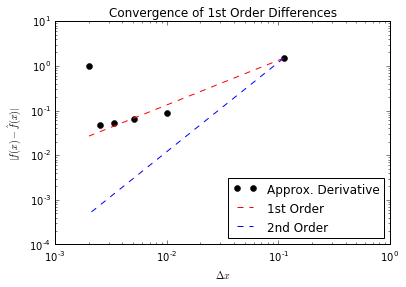

In [6]:
# ### INSERT CODE HERE
# Compute the error as a function of delta_x
delta_x = []
error = []
N = [10, 100, 200, 300, 400, 500]
for n in N:
    x_hat = numpy.linspace(0.0, 1.0, n)
    delta_x.append(x_hat[1] - x_hat[0])
    

    f_prime = numpy.empty(x_hat.shape)
    Qf = numpy.empty(x_hat.shape)
    errors = numpy.empty(x_hat.shape)
    
    #left point
    f_prime[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x[-1])
    Qf[0] = f_prime[0]*delta_x[-1]
    errors[0] = f(0.0) - f(0.0) - Qf[0]
    #right point
    f_prime[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x[-1])
    Qf[-1] = f_prime[-1]*delta_x[-1]
    errors[-1] = f(1.0) - f(0.0) - Qf[-1]
    #interval points
    f_prime = numpy.empty(x_hat.shape)
    f_prime[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])
    for i in xrange(1, len(x_hat)):
        Qf[i] = Qf[i-1] + f_prime[i]*delta_x[-1]
    errors = numpy.abs(f(x_hat) - f(0) - Qf)
    error.append(numpy.linalg.norm(numpy.abs(errors), ord=2))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f(x) - \hat{f}(x)|$")

plt.show()

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** (10) Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [7]:
import scipy.special
def trap_1(N):
    ### INSERT CODE HERE
    I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
    I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)
    x = numpy.linspace(0.0, 1.0, 1000)
    
    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x = x_hat[1] - x_hat[0]
    
    Is = 0.0
    sum_1 = 0.0
    for i in xrange(1, N):
        sum_1 += delta_x*I_s(x_hat[i])
    Is = (I_s(x_hat[N])*delta_x)/2.0 + sum_1

    Ic = 0.0
    sum_2 = 0.0
    for i in xrange(1, N):
        sum_2 += delta_x*I_c(x_hat[i])
    Ic = (I_c(x_hat[N])*delta_x)/2.0 + sum_2   
    return Is, Ic

In [8]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal rule only."    

Error: 7.32497950294e-05
Computed the integrals correctly using the trapezoidal rule only.


**(b)** (10) A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function such that

$$\int^1_0 w(x) f(x) dx = \sum^{N}_{i=1} w_i f(x_i)$$

For the weight $x^{-1/2}$ we can show that 

$$\int^1_0 \frac{f(x)}{\sqrt{x}} dx \approx \frac{2}{3} (2 f(0) + f(1))$$

Combining this formula with the trapezoidal rule approach above, evaluate the integrals again by using the trapezoid rule except for the partition $[0,\Delta x]$ that involves the singularity use the above weighted Newton-Cotes rule.  Note that you will have to map the rule to the partition.

In [9]:
def trap_wnc(N):
    ### INSERT CODE HERE
    I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
    I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)
    
    x = numpy.linspace(0.0, 1.0, 1000)
    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x = x_hat[1] - x_hat[0]
       
    Is = 0.0
    sum_1 = 0.0
    for i in xrange(1, N):
        sum_1 += delta_x*I_s(x_hat[i])
    Is = (2.0*(2.0*numpy.sin(0)+numpy.sin(delta_x))/3.0 + I_s(x_hat[N]))*delta_x/2.0 + sum_1

    Ic = 0.0
    sum_2 = 0.0
    for i in xrange(1, N):
        sum_2 += delta_x*I_c(x_hat[i])
    Ic = (2.0*(2.0*numpy.cos(0)+numpy.cos(delta_x))/3.0 + I_c(x_hat[N]))*delta_x/2.0 + sum_2
    return Is, Ic

In [10]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 6.49164964183e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(c)** (10) Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [11]:
def trap_transformed(N):
    ### INSERT CODE HERE
    I_c = lambda x: 2.0*numpy.cos(x**2)
    I_s = lambda x: 2.0*numpy.sin(x**2)
    
    
    x = numpy.linspace(0.0, 1.0, 1000)
    
    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x = x_hat[1] - x_hat[0]
    
    Is = 0.0
    sum_1 = 0.0
    for i in xrange(1, N):
        sum_1 += delta_x*I_s(x_hat[i])
    Is = (I_s(x_hat[N])*delta_x)/2.0 + sum_1

    Ic = 0.0
    sum_2 = 0.0
    for i in xrange(1, N):
        sum_2 += delta_x*I_c(x_hat[i])
    Ic = (I_c(x_hat[N])*delta_x)/2.0 + sum_2
    return Is, Ic

In [12]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print "Computed the integrals correctly using the trapezoidal rule."    

Error: 4.50254425055e-06
Computed the integrals correctly using the trapezoidal rule.


**(d)** (10) Do the same as in part (c) but use 3-point Gauss-Legendre quadrature.

In [13]:
def gauss_legendre_3(N):
    ### INSERT CODE HERE
    I_c = lambda x: 2.0*numpy.cos(x**2)
    I_s = lambda x: 2.0*numpy.sin(x**2)

    num_partitions = range(50, 1000, 50)
    delta_x = numpy.empty(len(num_partitions))


    for (j, N) in enumerate(num_partitions):
        x_hat = numpy.linspace(0.0, 1.0, N)
        delta_x[j] = x_hat[1] - x_hat[0]
    
        xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
        xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
        w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
        Is = 0.0
        Ic = 0.0
        #compute Is
        for i in xrange(0, N - 1):
            for k in xrange(len(xi)):
                Is += I_s(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k] 
        Is *= delta_x[j] / 2.0
        #compute Ic
        for i in xrange(0, N - 1):
            for k in xrange(len(xi)):
                Ic += I_s(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k] 
        Ic *= delta_x[j] / 2.0

    return Is, Ic

In [14]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 5.55111512313e-16
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** (10) Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

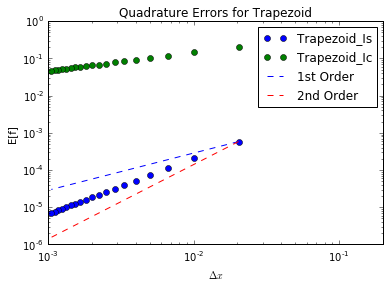

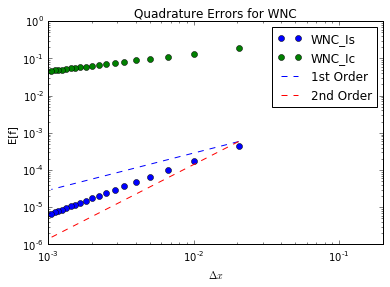

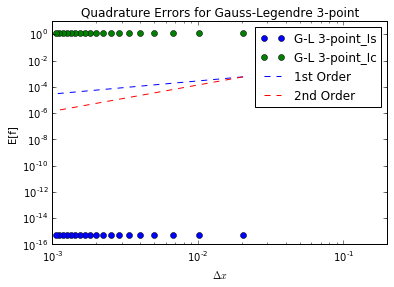

In [15]:
# Compute the error as a function of delta_x for each method
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_trap_Is = numpy.empty(len(num_partitions))
error_trap_Ic = numpy.empty(len(num_partitions))
error_wnc_Is = numpy.empty(len(num_partitions))
error_wnc_Ic = numpy.empty(len(num_partitions))
error_G_3point_Is = numpy.empty(len(num_partitions))
error_G_3point_Ic = numpy.empty(len(num_partitions))


for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoid
    Is_hat, Ic_hat = trap_1(N)
    error_trap_Is[j] = numpy.abs(Is_hat - Is)
    error_trap_Ic[j] = numpy.abs(Ic_hat - Ic)

    # Compute wnc    
    Is_wnc, Ic_wnc = trap_wnc(N)
    error_wnc_Is[j] = numpy.abs(Is_wnc - Is)
    error_wnc_Ic[j] = numpy.abs(Ic_wnc - Ic)

    # Compute Gauss-Legendre 3-point
    Is_G_3point, Ic_G_3point = gauss_legendre_3(N)
    error_G_3point_Is[j] = numpy.abs(Is_G_3point - Is)
    error_G_3point_Ic[j] = numpy.abs(Ic_G_3point - Ic)

#plot Trapezoid graph   
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_trap_Is, 'o', label="Trapezoid_Is")
axes.loglog(delta_x, error_trap_Ic, 'o', label="Trapezoid_Ic")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Quadrature Errors for Trapezoid")

axes.legend(loc=1)
axes.set_xlim((1e-3, 2e-1))

#plot WNC graph
fig_1 = plt.figure()
axes = fig_1.add_subplot(1, 1, 1)
axes.loglog(delta_x, error_wnc_Is, 'o', label="WNC_Is")
axes.loglog(delta_x, error_wnc_Ic, 'o', label="WNC_Ic")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Quadrature Errors for WNC")

axes.legend(loc=1)
axes.set_xlim((1e-3, 2e-1))

#plot Gauss-3points graph
fig_2 = plt.figure()
axes = fig_2.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_G_3point_Is, 'o', label="G-L 3-point_Is")
axes.loglog(delta_x, error_G_3point_Ic, 'o', label="G-L 3-point_Ic")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_Is[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Quadrature Errors for Gauss-Legendre 3-point")

axes.legend(loc=1)
axes.set_xlim((1e-3, 2e-1))
plt.show()

**(f)** (10) Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

Because $I_s$ is sine function, when x is reaching 0 at the left side, it goes to 0. 

However, $I_c$ is $\frac{cos(x)}{\sqrt x}$, when x is reaching 0, $cos(x)$ is 1, the denominator goes to 0, thus, the whole function goes to infinite. Therefore, when we integrate it, it will cause more error. That's why $I_c$ is less accurate than $I_s$.